### Feature Scaling (Multi-variable)

1. [feature scaling](#section_1)

#### <a name="section_1"></a> Feature Scaling

In [2]:
# imports
import copy, math
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=2)

In [6]:
# loading data

def load_house_data():
    data = np.loadtxt("houses.txt", delimiter=',', skiprows=1)
    X = data[:,:4]
    y = data[:,4]
    return X, y

X_train, y_train = load_house_data()

# features
X_features = ["size(sqft)", "bedrooms", "floors", "age"]

In [10]:
# linear regression with multiple variables related functions

def compute_cost(X, y, w, b):
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(w, X[i]) + b
        cost = cost + (f_wb_i - y[i]) ** 2
    cost = cost / (2 * m)
    return cost

def compute_gradient (X, y, w, b):
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m, n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0
    
    for i in range(m):
        err = (np.dot(w, X[i]) + b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * X[i,j]
        dj_db = dj_db + err
    
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    
    return dj_db, dj_dw

def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
   
    # An array to store cost J at each iteration primarily for graphing later
    J_history = []
    w0_hist = []
    b_hist = []
    
    w = copy.deepcopy(w_in)
    b = copy.deepcopy(b_in)
    
    print(f"Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  ")
    print(f"---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|")
    
    for i in range (num_iters):
        
        # calculate gradients
        dj_db, dj_dw = gradient_function (X, y, w, b)
        
        # update params using w, b, alpha & gradients
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        # save cost J at each iteration
        if i < 100000:
            J_history.append (cost_function(X, y, w, b))
            w0_hist.append (w[0])
            b_hist.append (b) 
            
        if i% math.ceil(num_iters/10) == 0:
            cst = J_history[i]
            print(f"{i:9d} {cst:0.5e} {w[0]: 0.1e} {w[1]: 0.1e} {w[2]: 0.1e} {w[3]: 0.1e} {b: 0.1e} {dj_dw[0]: 0.1e} {dj_dw[1]: 0.1e} {dj_dw[2]: 0.1e} {dj_dw[3]: 0.1e} {dj_db: 0.1e}")     
        
    
        
    return w, b, J_history, w0_hist, b_hist

# plotting cost vs iterations, cost vs w

def plot_cost_iter_w(J_hist, w0_hist):
    
    fig, ax = plt.subplots(1, 2, figsize=(12,6))
    
    ax[0].plot(np.arange(0,len(J_hist), 1), J_hist)
    ax[0].set_title("Cost vs Iteration")
    ax[0].set_ylabel("Cost")
    ax[0].set_xlabel("iteration")
    
    
    ax[1].scatter(w0_hist, J_hist)
    ax[1].plot(w0_hist, J_hist)
    ax[1].set_title("Cost vs w[0]")
    ax[1].set_ylabel("Cost")
    ax[1].set_xlabel("w[0]")
    

### without feature scaling

 - notice below that djdw0 is significantly larger than djdw1, djdw2, djdw3 & djdb (in absolute value)
 - if we run below scenario for larger number of iterations, eventually values of derivates will become similar in value & range
 - this is because input features do not belong to similar range to begin with
 - it is possible that we can scale the input features to a similar range, that will make the derivatives similar in values as well, this will help gradient descent to converge faster (in less number of iterations) and make the algorithm much faste
 
 ![](img_fs_intuition.JPG)
 
 ![](img_fs_obs.JPG)

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 6.64616e+04  5.0e-01  9.1e-04  4.7e-04  1.1e-02  3.3e-04 -5.5e+05 -1.0e+03 -5.2e+02 -1.2e+04 -3.6e+02
        1 6.18990e+04  1.8e-02  2.1e-05  2.0e-06 -7.9e-04  1.9e-05  5.3e+05  9.8e+02  5.2e+02  1.3e+04  3.4e+02
        2 5.76572e+04  4.8e-01  8.6e-04  4.4e-04  9.5e-03  3.2e-04 -5.1e+05 -9.3e+02 -4.8e+02 -1.1e+04 -3.4e+02
        3 5.37137e+04  3.4e-02  3.9e-05  2.8e-06 -1.6e-03  3.8e-05  4.9e+05  9.1e+02  4.8e+02  1.2e+04  3.2e+02
        4 5.00474e+04  4.6e-01  8.2e-04  4.1e-04  8.0e-03  3.2e-04 -4.8e+05 -8.7e+02 -4.5e+02 -1.1e+04 -3.1e+02
        5 4.66388e+04  5.0e-02  5.6e-05  2.5e-06 -2.4e-03  5.6e-05  4.6e+05  8.5e+02  4.5e+02  1.2e+04  2.9e+02
        6 4.34700e+04  4.5e-01  7.8e-04  3.8e-04  6.4e-03  3.2e-04 -4.4e+05 -8.1e+02 -4.2e+02 -9.8e+03 -

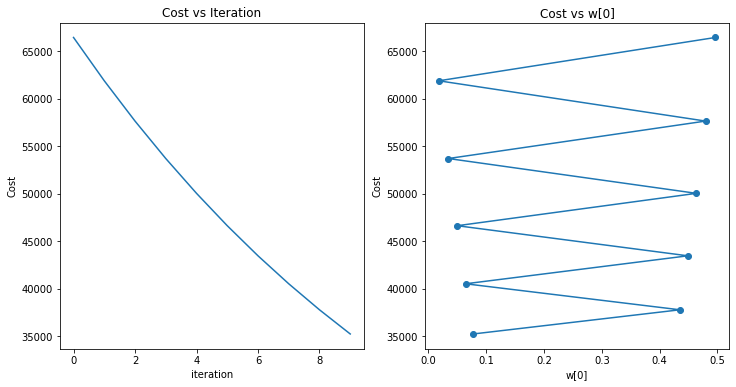

In [12]:
w_init = np.zeros(X_train.shape[1])
b_init = 0
iterations = 10

# setting alpha to 9e-7
alpha = 9e-7

w_final, b_final ,J_hist, w0_hist, b_hist = gradient_descent(X_train, y_train, w_init, b_init, compute_cost, compute_gradient, alpha, iterations)

plot_cost_iter_w(J_hist, w0_hist)

### feature scaling techniques

![](img_fs_tecqs.JPG)

![](img_fs_zscore_norm.JPG)

In [13]:
def zscore_normalize_features(X):
    """
    computes  X, zcore normalized by column
    
    Args:
      X (ndarray (m,n))     : input data, m examples, n features
      
    Returns:
      X_norm (ndarray (m,n)): input normalized by column
      mu (ndarray (n,))     : mean of each feature
      sigma (ndarray (n,))  : standard deviation of each feature
    """
    
    # mean
    mu = np.mean(X, axis=0)
    
    # standard deviation
    sigma = np.std(X, axis=0)
    
    X_norm = (X - mu)/sigma
    
    return (X_norm, mu, sigma)

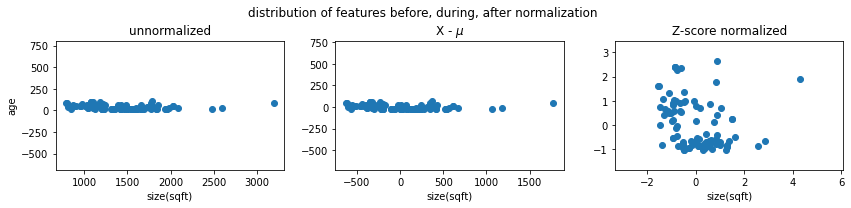

In [14]:
# visualizing data after z-score normalization

mu = np.mean(X_train, axis=0)
sigma = np.std(X_train, axis=0)
X_mean = (X_train - mu)
X_norm = (X_train - mu) / sigma

fig,ax=plt.subplots(1, 3, figsize=(12, 3))
ax[0].scatter(X_train[:,0], X_train[:,3])
ax[0].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[0].set_title("unnormalized")
ax[0].axis('equal')

ax[1].scatter(X_mean[:,0], X_mean[:,3])
ax[1].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[1].set_title(r"X - $\mu$")
ax[1].axis('equal')

ax[2].scatter(X_norm[:,0], X_norm[:,3])
ax[2].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[2].set_title(r"Z-score normalized")
ax[2].axis('equal')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("distribution of features before, during, after normalization")
plt.show()

### observations

![](img_fs_norm_visual.JPG)

In [17]:
# normalizing all original input features

X_norm, X_mu, X_sigma = zscore_normalize_features(X_train)

print(f"X_mu (mean) = {X_mu}, \nX_sigma (standard deviation) = {X_sigma}")
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

X_mu (mean) = [1.42e+03 2.72e+00 1.38e+00 3.84e+01], 
X_sigma (standard deviation) = [411.62   0.65   0.49  25.78]
Peak to Peak range by column in Raw        X:[2.41e+03 4.00e+00 1.00e+00 9.50e+01]
Peak to Peak range by column in Normalized X:[5.85 6.14 2.06 3.69]


### observations

 - note that peak to peak values are much closer in the case of normalized features (reduced from factor of 1000s to 2-3)


In [19]:
# visualizing all features before & after normalization

## todo